In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

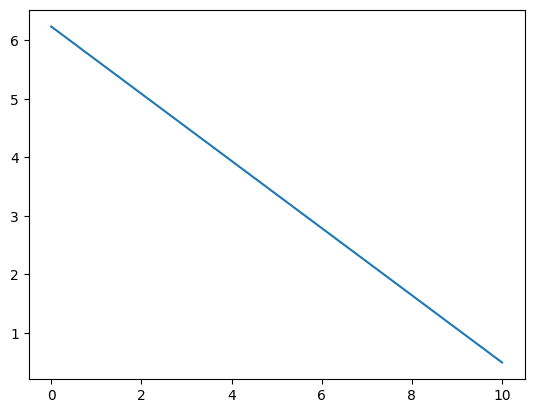

In [60]:
def func(t, y):
    return y[1], -3*y[0]

t_span = 0, 2*np.pi
alpha, betha = 7, -7

def theta(u):
    solution = solve_ivp(func, t_span, (alpha, u), t_eval = np.linspace(t_span[0], t_span[1], 100))
    return solution.y[0][-1] - betha

vec_theta = np.vectorize(theta)

plt.plot(np.linspace(0,10,100), vec_theta(np.linspace(0,10,100)))
plt.show()

In [59]:
def root(f, a, b, eps):
    c = (a+b)/2
    while np.absolute(f(c)) > eps:
        if f(a)*f(c) < 0: b = c
        elif f(c)*f(b) < 0: a = c
        else: return None
        
        c = (a+b)/2
    return c

u = root(theta, -2, 2, 10**(-3))

sol = solve_ivp(func, t_span, (alpha, u), t_eval=np.linspace(t_span[0], t_span[1],  100))

plt.plot(sol.t, sol.y[0])

KeyboardInterrupt: 